In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data
df = pd.read_csv("BRCA1_HUMAN_Findlay_2018.csv")
print(df)

      mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
...      ...                                                ...        ...   
1832  I1855R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.464328   
1833  I1855M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.021941   
1834  I1855L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.233297   
1835  I1855K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.863844   
1836  I1855T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.291519   

      DMS_score_bin  
0                 0  
1                 0

In [3]:
# weitere Zeile mit 'position'
import re 

def get_number_from_text(text):
    return re.findall(r'\d{1,4}',text)[0]

df['position']=df['mutant'].apply(get_number_from_text)
print(df)

      mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
...      ...                                                ...        ...   
1832  I1855R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.464328   
1833  I1855M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.021941   
1834  I1855L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.233297   
1835  I1855K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.863844   
1836  I1855T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.291519   

      DMS_score_bin position  
0                 0        1  
1

In [4]:
#Zeile mit neuer Aminosäure
test1=df.mutant.str.extract(r'(\d)([ARNDCQEGHILKTMfPOUSTWYV])')
df["new_aa"]=test1[1]
print(df)

      mutant                                   mutated_sequence  DMS_score  \
0        M1I  IDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.502128   
1        M1V  VDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.025645   
2        M1T  TDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -1.656569   
3        M1R  RDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.481580   
4        M1L  LDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -2.516529   
...      ...                                                ...        ...   
1832  I1855R  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.464328   
1833  I1855M  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.021941   
1834  I1855L  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...   0.233297   
1835  I1855K  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.863844   
1836  I1855T  MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...  -0.291519   

      DMS_score_bin position new_aa  
0                 0      

In [6]:
df_filtered = df[df['DMS_score_bin'] == 0]

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Extract the independent variable (feature)
X = df_filtered[['position']]  # Assuming 'DMS_score' is the independent variable

# Extract the dependent variable (target)
y = df_filtered['DMS_score']  # Assuming 'mutant' is the dependent variable

# Create a linear regression object
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the target variable for new data points
# Assuming you have a new dataframe named 'new_df'
X_new = df[['position']]  # Extract the relevant column
y_pred = model.predict(X_new)

# Print the predicted values
print(y_pred)


[-1.98565131 -1.98565131 -1.98565131 ... -1.91717133 -1.91717133
 -1.91717133]


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Split the data into input (positions) and output (DMS_score)
X = df_filtered['position'].values.reshape(-1, 1)
y = df_filtered['DMS_score'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
# Predict the DMS_scores for the test data
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)

# Print the model coefficients and score
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)
print("R-squared score:", score)

Intercept: -1.9731456982397582
Coefficient: [3.06161459e-05]
R-squared score: 0.0036057233880457673


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


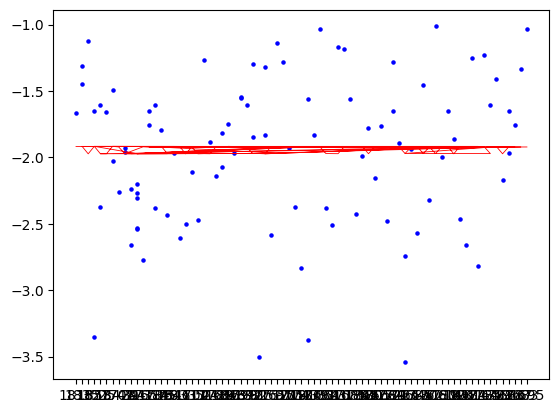

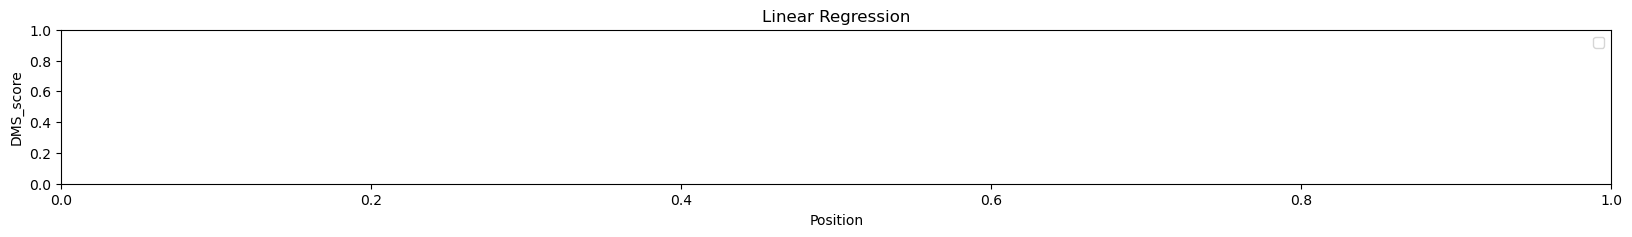

In [9]:
import matplotlib.pyplot as plt

# Extract the column for plotting
X_test_column = X_test[:, 0]

# Plot the actual data points
plt.scatter(X_test_column, y_test, color='blue', label='Actual', s=5)

# Plot the predicted values
plt.plot(X_test_column, y_pred, color='red', linewidth=0.6, label='Predicted')
plt.figure(figsize=(20,2))

# Set labels and title
plt.xlabel('Position')
plt.ylabel('DMS_score')
plt.title('Linear Regression')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [10]:



import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Split the data into input (positions) and output (DMS_score)
X = df_filtered['position'].values.reshape(-1, 1)
y = df_filtered['DMS_score'].values


# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X, y)

model = LinearRegression().fit(X, y)

r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")

coefficient of determination: 0.0025851035421701196
intercept: -1.9856882459589416
